In [9]:
""" RANDOM FOREEST INTITION """
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# importing the dataset
dataset = pd.read_csv('Data.csv', names = ['Frequency', 'AngleOfAttack', 'ChordLength', 'Velocity', 'thickness', 'soundScale'])
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [11]:
#applied stadard scaler 

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)
y = std.fit_transform(y.reshape(-1,1))


In [12]:
# splitting up the dtasets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

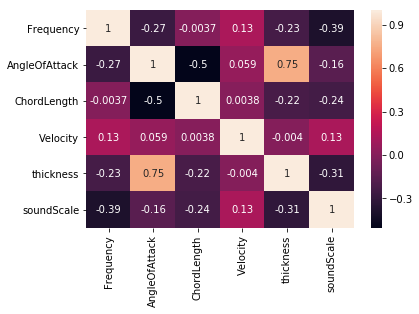

In [20]:
sns.heatmap(dataset.corr(),annot=True)

In [14]:
# fitting the model into Random Forest regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(Xtrain, ytrain)

c:\users\new u\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
# predicting the values
y_pred = regressor.predict(Xtest)


In [16]:
# printing the accuracies
regressor.score(Xtrain, ytrain)
regressor.score(Xtest, ytest)

0.9329843824685445

In [17]:
from sklearn.metrics import r2_score
print(r2_score(ytest, y_pred))

0.9329843824685446


In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_pred)

0.06683857001799055

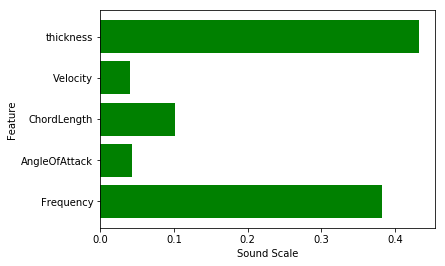

In [19]:
# visualisingthe result
n_features = dataset.iloc[:, :-1].values.shape[1]
plt.barh(range(n_features), regressor.feature_importances_, align='center', color = 'g')
plt.yticks(np.arange(n_features),('Frequency', 'AngleOfAttack', 'ChordLength', 'Velocity', 'thickness', 'soundScale') )
plt.xlabel('Sound Scale')
plt.ylabel('Feature')
plt.show()